In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def normalize_physics_props(case_params):
    """
    Normalize the physics properties in-place.
    """
    case_params["RE"] = (
        case_params["RE"] - 2822.248243559719
    ) / 3468.165537716764

def normalize_bc(case_params):
    """
    Normalize the boundary conditions in-place.
    """
    case_params['vel_top'] = (case_params['vel_top'] - 12.245551723507026) / 15.53312988836465

U_list = []
u_list = []
v_list = []
parm_list = []
stable_state_diff = 0.0001

for i,re in enumerate([50, 400, 1000, 5000]): # , 3200
    pth = f'/home/data2/cenjianhuan/NewData/cavity/RE_BC_DATA/D_0.5_Re_{re}.csv'
    data = np.loadtxt(pth, delimiter=',', skiprows=9)
    print(data.shape)
    x = data[:, 0].reshape(128, 128)[::2,::2]
    y = data[:, 1].reshape(128, 128)[::2,::2]
    u = data[:, 2::3].reshape(128, 128, -1)[::2,::2]
    v = data[:, 3::3].reshape(128, 128, -1)[::2,::2]
    p = data[:, 4::3].reshape(128, 128, -1)[::2,::2]
    U = np.sqrt(u**2 + v**2)
    this_case_params = {'RE': re, 'density': 1.0, 'height': 1.0, 'vel_top': 1.0, 'width': 1.0}
    
    U_list.append(U)
    u_list.append(u)
    v_list.append(v)

    num_steps = U.shape[-1] - 1
    for i in range(num_steps):
        inp = np.stack((u[:,:,i], v[:,:,i], p[:,:,i]), axis=-1)
        out = np.stack((u[:,:,i+1], v[:,:,i+1], p[:,:,i+1]), axis=-1)
        # Check for convergence
        inp_magn = np.sqrt(inp[:,:,0] ** 2 + inp[:,:,1] ** 2 + inp[:,:,2] ** 2)
        out_magn = np.sqrt(out[:,:,0] ** 2 + out[:,:,1] ** 2 + out[:,:,2] ** 2)
        diff = np.abs(inp_magn - out_magn).mean()
        if diff < stable_state_diff and i / num_steps > 1 / 10:
            print(
                f"Converged at {i} out of {num_steps},"
                f" {this_case_params}"
            )
            break
    
    # Normalize the physics properties
    normalize_physics_props(this_case_params)
    normalize_bc(this_case_params)
    
    case_params_vec = []
    for k in ['RE', 'density', 'height', 'vel_top', 'width']:
        # print(k, this_case_params[k])
        case_params_vec.append(this_case_params[k])
    case_params = torch.tensor(case_params_vec).reshape(1, 1, 1, 5).repeat(1, 64, 64, 1)  #(p)
    parm_list.append(case_params)

# grid (1, 64, 64, 2)
grid = torch.stack([torch.tensor(x).float(), torch.tensor(y).float()], dim=-1).unsqueeze(0)
# case_params (4, 64, 64, 5)
case_params = torch.cat(parm_list, dim=0)
# mask (1, 64, 64, 1)
mask = torch.ones(1, 64, 64, 1)
# input (T, 4, 64, 64, 2)
inputs = torch.stack([torch.tensor(u_list), torch.tensor(v_list)], dim=-1)

(16384, 3005)
Converged at 101 out of 1000, {'RE': 50, 'density': 1.0, 'height': 1.0, 'vel_top': 1.0, 'width': 1.0}
(16384, 3005)
Converged at 101 out of 1000, {'RE': 400, 'density': 1.0, 'height': 1.0, 'vel_top': 1.0, 'width': 1.0}
(16384, 3005)
Converged at 120 out of 1000, {'RE': 1000, 'density': 1.0, 'height': 1.0, 'vel_top': 1.0, 'width': 1.0}
(16384, 3005)
Converged at 301 out of 1000, {'RE': 5000, 'density': 1.0, 'height': 1.0, 'vel_top': 1.0, 'width': 1.0}


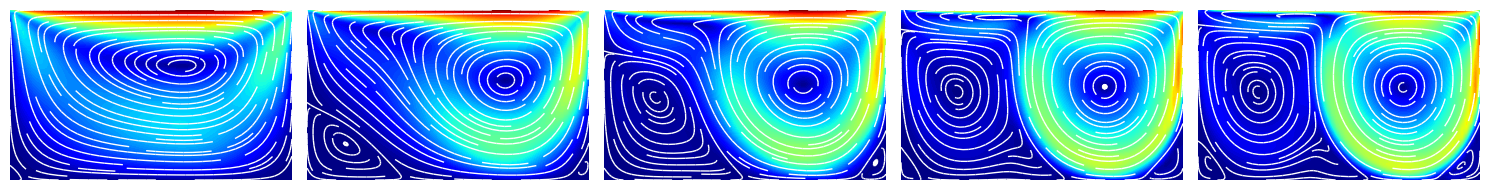

In [13]:
fig, axs = plt.subplots(1, 5, figsize=(15,2))
fig.set_tight_layout(True)
for i in range(5):
    U = U_list[i]
    u = u_list[i]
    v = v_list[i]
    axs[i].axis("off")
    extent = [x.min(), x.max(), y.min(), y.max()]
    axs[i].contourf(x, y, U[:, :, -1], 100, cmap='jet', extent=extent)
    axs[i].streamplot(x, y, u[:, :, -1], v[:, :, -1], color='white', linewidth=1, arrowsize=0)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def normalize_physics_props(case_params):
    """
    Normalize the physics properties in-place.
    """
    case_params["RE"] = (
        case_params["RE"] - 2822.248243559719
    ) / 3468.165537716764

def normalize_bc(case_params):
    """
    Normalize the boundary conditions in-place.
    """
    case_params['vel_top'] = (case_params['vel_top'] - 12.245551723507026) / 15.53312988836465

input_list = []
parm_list  = []
stable_state_diff = 0.0001

for i,re in enumerate([50, 400, 1000, 5000]): # , 3200
    pth = f'/home/data2/cenjianhuan/NewData/cavity/RE_BC_DATA/D_0.5_Re_{re}.csv'
    data = np.loadtxt(pth, delimiter=',', skiprows=9)
    print(data.shape)
    x = data[:, 0].reshape(128, 128)[::2,::2]
    y = data[:, 1].reshape(128, 128)[::2,::2]
    u = data[:, 2::3].reshape(128, 128, -1)[::2,::2]
    v = data[:, 3::3].reshape(128, 128, -1)[::2,::2]
    p = data[:, 4::3].reshape(128, 128, -1)[::2,::2]
    U = np.sqrt(u**2 + v**2)
    this_case_params = {'RE': re, 'density': 1.0, 'height': 0.5, 'vel_top': 1.0, 'width': 1.0}

    num_steps = U.shape[-1] - 1
    for i in range(num_steps):
        inp = np.stack((u[:,:,i], v[:,:,i], p[:,:,i]), axis=-1)
        out = np.stack((u[:,:,i+1], v[:,:,i+1], p[:,:,i+1]), axis=-1)
        # Check for convergence
        inp_magn = np.sqrt(inp[:,:,0] ** 2 + inp[:,:,1] ** 2 + inp[:,:,2] ** 2)
        out_magn = np.sqrt(out[:,:,0] ** 2 + out[:,:,1] ** 2 + out[:,:,2] ** 2)
        diff = np.abs(inp_magn - out_magn).mean()
        if diff < stable_state_diff and i / num_steps > 1 / 10:
            print(
                f"Converged at {i} out of {num_steps},"
                f" {this_case_params}"
            )
            break
    
    # Normalize the physics properties
    normalize_physics_props(this_case_params)
    normalize_bc(this_case_params)
    
    case_params_vec = []
    for k in ['RE', 'density', 'height', 'vel_top', 'width']:
        # print(k, this_case_params[k])
        case_params_vec.append(this_case_params[k])
    case_params = torch.tensor(case_params_vec).reshape(1, 1, 1, 5).repeat(1, 64, 64, 1)  #(p)
    parm_list.append(case_params)
    input_list.append(np.stack((u, v, p), axis=-1).transpose(2, 0, 1, 3))

# mask (1, 64, 64, 1)
mask = torch.ones(1, 64, 64, 1)
# grid (1, 64, 64, 2)
grid = torch.stack([torch.tensor(x).float(), torch.tensor(y).float()], dim=-1).unsqueeze(0)
# case_params (case, 1, 64, 64, 5)
case_params = torch.cat(parm_list, dim=0)
# input (case, T, 64, 64, 2)
inputs = torch.tensor(input_list)
print(inputs.shape, case_params.shape, grid.shape, mask.shape)

(16384, 3005)
Converged at 101 out of 1000, {'RE': 50, 'density': 1.0, 'height': 0.5, 'vel_top': 1.0, 'width': 1.0}
(16384, 3005)
Converged at 101 out of 1000, {'RE': 400, 'density': 1.0, 'height': 0.5, 'vel_top': 1.0, 'width': 1.0}
(16384, 3005)
Converged at 120 out of 1000, {'RE': 1000, 'density': 1.0, 'height': 0.5, 'vel_top': 1.0, 'width': 1.0}
(16384, 3005)
Converged at 301 out of 1000, {'RE': 5000, 'density': 1.0, 'height': 0.5, 'vel_top': 1.0, 'width': 1.0}
torch.Size([4, 1001, 64, 64, 3]) torch.Size([4, 64, 64, 5]) torch.Size([1, 64, 64, 2]) torch.Size([1, 64, 64, 1])


/tmp/ipykernel_2522544/3237643873.py:69: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525552411/work/torch/csrc/utils/tensor_new.cpp:230.)
  inputs = torch.tensor(input_list)


/home/data2/cenjianhuan/anaconda3/envs/torch38/lib/python3.8/site-packages/matplotlib/patches.py:3331: RuntimeWarning: invalid value encountered in scalar divide
  cos_t, sin_t = head_length / head_dist, head_width / head_dist


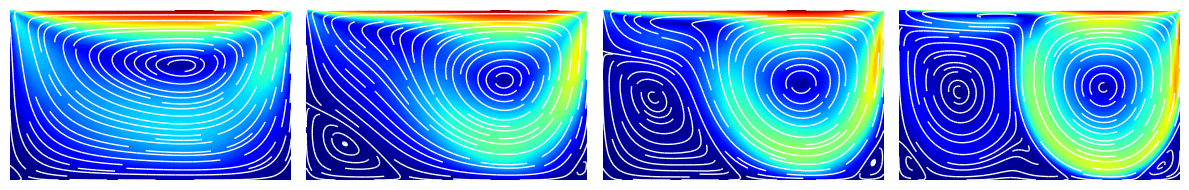

In [2]:
fig, axs = plt.subplots(1, 4, figsize=(12,2))
fig.set_tight_layout(True)
for i in range(4):
    U = torch.sqrt(inputs[i, :, :, :, 0] ** 2 + inputs[i, :, :, :, 1] ** 2).cpu().numpy()
    u = inputs[i, :, :, :, 0].cpu().numpy()
    v = inputs[i, :, :, :, 1].cpu().numpy()
    axs[i].axis("off")
    extent = [x.min(), x.max(), y.min(), y.max()]
    case_id = -1
    axs[i].contourf(x, y, U[case_id], 100, cmap='jet', extent=extent)
    axs[i].streamplot(x, y, u[case_id], v[case_id], color='white', linewidth=1, arrowsize=0)
plt.show()

Model OFormer has 1368067 parameters
Load model from ./checkpoint/OFormer/cavity_ReD_bc_re/OFormer_lr0.0006_bs16cavityReD_bc_re-best.pt
start ploting...


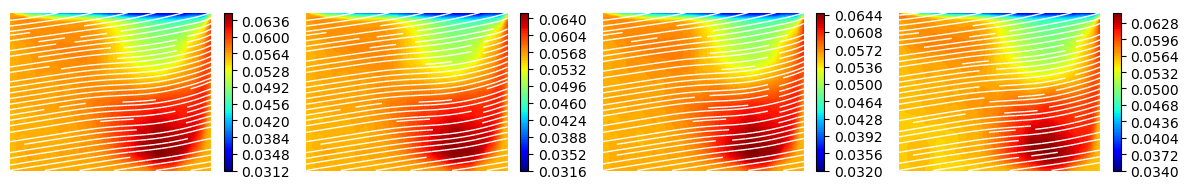

In [10]:
from utils import get_model, get_dataset, get_dataloader, get_min_max, setup_seed
from functools import reduce
from pathlib import Path
from torch import Tensor
from typing import Optional
import yaml
import argparse
import numpy as np
import os
import typing
import matplotlib.pyplot as plt
import torch

model = 'OFormer'
config_file = f'./config/{model}/config_cavity_ReD_bc_re.yaml'
with open(config_file, 'r') as f:
    args = yaml.safe_load(f)
args['dataset']['multi_step_size'] = 1
setup_seed(args["seed"])

#init
device = torch.device("cpu") # "cuda:0" if torch.cuda.is_available() else 
saved_dir = os.path.join(args["saved_dir"], os.path.join(args["model_name"], args["flow_name"] + '_' + args['dataset']['case_name']))

fig_dir = os.path.join(args['output_dir'], 'fig')
fig_dir = os.path.join(fig_dir, os.path.join(args["model_name"],args["flow_name"] + '_' + args['dataset']['case_name']))
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

dataset_args = args["dataset"]

saved_model_name = (args["model_name"] + 
                    f"_lr{args['optimizer']['lr']}" +
                    f"_bs{args['dataloader']['train_batch_size']}" +
                    args["flow_name"] + 
                    dataset_args['case_name']
                    )

saved_path = os.path.join(saved_dir, saved_model_name)
min_ = torch.tensor([-0.7218633890151978, -0.7599146366119385, -12.665838241577148]) # .reshape(1, 1, 1, 3)
max_ = torch.tensor([ 0.9996230602264404,  0.45396965742111206, 18.963367462158203]) # .reshape(1, 1, 1, 3)
args["model"]["num_points"] = 64*64

#model
model = get_model(2, 5, args)
num_params = sum(p.numel() for p in model.parameters())
print(f"Model {args['model_name']} has {num_params} parameters")

#load checkpoint
checkpoint = torch.load(saved_path + "-best.pt")
print(f"Load model from {saved_path}-best.pt")
model.load_state_dict(checkpoint["model_state_dict"])
model.to(device)

#test and plot
print('start ploting...')
results = []
max_iter = [1, 1, 1, 1] # [101, 101, 101, 101]
model.eval()
with torch.no_grad():
    inputs = inputs.float().to(device)
    case_params = case_params.float().to(device)
    grid = grid.float().to(device)
    mask = mask.float().to(device)
    for i in range(4):
        x = inputs[i][100].unsqueeze(0)
        params = case_params[i].unsqueeze(0)
        x = (x - min_) / (max_ - min_)
        for j in range(max_iter[i]):
            pred = model(x, params, mask, grid)
            # if np.abs(np.sqrt(pred[0,0,0,0]**2 + pred[0,0,0,1]**2 + pred[0,0,0,2]**2) - np.sqrt(x[0,0,0,0]**2 + x[0,0,0,1]**2 + x[0,0,0,2]**2)) < 0.0001:
            #     print(f'converged at iter {j}')
            #     break
            x = pred.reshape(x.shape)
            # print(x[0,0,0,:], x[0,0,-1,:], x[0,-1,0,:], x[0,-1,-1,:])
        pred = pred * (max_ - min_) + min_
        results.append(pred.reshape(x.shape))

#plot
fig, axs = plt.subplots(1, 4, figsize=(12,2))
fig.set_tight_layout(True)
x = grid[0, :, :, 0].cpu().numpy()
y = grid[0, :, :, 1].cpu().numpy()
for i in range(4):
    U = np.sqrt(results[i][0,:,:,0].cpu().numpy()**2 + results[i][0,:,:,1].cpu().numpy()**2)
    u = results[i][0,:,:,0].cpu().numpy()
    v = results[i][0,:,:,1].cpu().numpy()
    axs[i].axis("off")
    extent = [x.min(), x.max(), y.min(), y.max()]
    im = axs[i].contourf(x, y, U, 100, cmap='jet', extent=extent)
    axs[i].streamplot(x, y, u, v, color='white', linewidth=1, arrowsize=0)
    # bar
    cbar = plt.colorbar(im, ax=axs[i])

In [5]:
preds = torch.stack(results, dim=0)
print(preds.shape)
gts = inputs[:, 201].unsqueeze(1)
print(gts.shape)
err = torch.abs(preds - gts).cpu().numpy()
# mse, nmse, maxe: [4, 1, 64, 64, 3] -> [3]
mse  = np.mean(err**2, axis=(0,1,2,3))
nmse = np.mean(err**2, axis=(0,1,2,3)) / np.mean(gts.cpu().numpy()**2, axis=(0,1,2,3))
maxe = np.max(err, axis=(0,1,2,3))
print(mse, nmse, maxe, sep='\n')

torch.Size([4, 1, 64, 64, 3])
torch.Size([4, 1, 64, 64, 3])
[ 0.06402725  0.02337028 22.628405  ]
[1.0099390e+00 9.7576284e-01 1.1746835e+03]
[0.9878305  0.69996166 8.552064  ]
